<a href="https://colab.research.google.com/github/wctseng99/2022-Fintech/blob/main/Solar_power_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load data
#https://drive.google.com/file/d/12-2P8YpuJ0UquvPeDhrfEao-pVTqOtPj/view?usp=sharing
#https://drive.google.com/file/d/1aXd_fKHKDd0Bil1y-3x5Kt-QJ14j9Osr/view?usp=sharing
!gdown '12-2P8YpuJ0UquvPeDhrfEao-pVTqOtPj' --output testdata.csv
!gdown '1aXd_fKHKDd0Bil1y-3x5Kt-QJ14j9Osr' --output traindata.csv

Downloading...
From: https://drive.google.com/uc?id=12-2P8YpuJ0UquvPeDhrfEao-pVTqOtPj
To: /content/testdata.csv
100% 760k/760k [00:00<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aXd_fKHKDd0Bil1y-3x5Kt-QJ14j9Osr
To: /content/traindata.csv
100% 3.09M/3.09M [00:00<00:00, 202MB/s]


# import module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Training data preparation

In [ ]:
# read data
train_data = pd.read_csv("traindata.csv")
train_data

,capacity_factor,測站氣壓(hPa),測站最高氣壓(hPa),測站最低氣壓(hPa),氣溫(℃),最高氣溫(℃),最低氣溫(℃),相對溼度(%),最小相對溼度(%),風速(m/s),...,最大陣風風向(360degree),降水量(mm),降水時數(hour),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,總雲量(0~10)
0,0.1562,1020.7,1023.3,1018.3,18.7,22.8,15.8,74.0,61.0,2.9,...,51.0,0.0,0.0,7.9,74.5,12.62,21.7,2.5,6.0,1.5
1,0.1516,1019.3,1021.6,1016.9,18.2,23.3,14.2,82.0,61.0,1.4,...,111.0,0.0,0.0,8.4,79.1,12.29,8.2,1.9,5.0,1.5
2,0.1631,1019.4,1021.5,1017.4,18.0,20.5,16.4,76.0,60.0,3.6,...,88.0,0.0,0.0,9.4,88.5,12.92,9.3,3.2,6.0,0.3
3,0.0675,1017.8,1020.2,1015.9,17.7,20.9,14.2,78.0,62.0,1.5,...,25.0,0.0,0.0,0.2,1.9,4.73,7.0,-0.9,3.0,6.2
4,0.1081,1015.8,1017.9,1013.6,19.4,24.0,16.2,82.0,64.0,1.7,...,115.0,0.0,0.6,5.5,51.7,9.94,3.4,2.0,6.0,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34577,0.0737,1021.4,1023.2,1019.4,16.8,19.7,15.1,82.0,73.0,1.4,...,2.0,0.0,0.7,0.0,0.0,8.39,5.3,-2.0,4.0,9.8
34578,0.1546,1019.9,1022.0,1017.1,18.7,23.3,14.7,81.0,59.0,1.2,...,29.0,0.0,0.0,8.5,79.3,17.17,8.5,2.9,6.0,1.5
34579,0.1550,1019.0,1020.5,1017.0,20.3,25.2,17.1,80.0,57.0,1.3,...,297.0,0.0,0.0,9.9,92.3,17.33,5.0,3.3,6.0,0.0
34580,0.1040,1018.5,1019.6,1016.0,19.9,24.1,17.8,75.0,60.0,1.4,...,335.0,0.0,0.0,2.3,21.4,12.16,4.3,3.3,5.0,8.8


In [ ]:
# look for NAN number in each factor
print('factor               NaN numbers')
train_data.isnull().sum()

factor               NaN numbers


capacity_factor         0
測站氣壓(hPa)            3347
測站最高氣壓(hPa)          3618
測站最低氣壓(hPa)          3627
氣溫(℃)                3486
最高氣溫(℃)              3635
最低氣溫(℃)              3691
相對溼度(%)              4897
最小相對溼度(%)            4574
風速(m/s)              3423
風向(360degree)        3425
最大陣風(m/s)            3621
最大陣風風向(360degree)    3621
降水量(mm)               208
降水時數(hour)            692
日照時數(hour)            766
日照率(%)                774
全天空日射量(MJ/㎡)          669
能見度(km)              3246
A型蒸發量(mm)            9119
日最高紫外線指數             7006
總雲量(0~10)            3248
dtype: int64

In [ ]:
# look for NAN value
train_data[train_data['測站氣壓(hPa)'].isnull()]

,capacity_factor,測站氣壓(hPa),測站最高氣壓(hPa),測站最低氣壓(hPa),氣溫(℃),最高氣溫(℃),最低氣溫(℃),相對溼度(%),最小相對溼度(%),風速(m/s),...,最大陣風風向(360degree),降水量(mm),降水時數(hour),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,總雲量(0~10)
79,0.1403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,2.6,21.6,11.35,7.6,4.3,6.0,7.4
98,0.1415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,8.0,10.84,2.4,2.1,6.0,8.0
211,0.0183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.1,0.0,0.0,1.46,4.8,-1.5,2.0,10.0
212,0.0550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.1,0.0,0.0,5.97,8.5,-1.3,5.0,9.8
213,0.1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.3,9.9,12.98,9.3,2.5,8.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33000,0.1724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,5.3,44.8,15.67,NaN,NaN,NaN,NaN
33001,0.2092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,10.3,87.1,21.05,NaN,NaN,NaN,NaN
33002,0.2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,9.6,81.4,19.88,NaN,NaN,NaN,NaN
33003,0.1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,9.7,82.4,19.60,NaN,NaN,NaN,NaN


In [ ]:
# drop nan rows https://sparkbyexamples.com/pandas/pandas-drop-rows-with-nan-values-in-dataframe/
# train_data = train_data.dropna() # drop rows with nan value
train_data = train_data.dropna(subset=['氣溫(℃)']) # drop rows based on specifice column containing nan value
train_data

,capacity_factor,測站氣壓(hPa),測站最高氣壓(hPa),測站最低氣壓(hPa),氣溫(℃),最高氣溫(℃),最低氣溫(℃),相對溼度(%),最小相對溼度(%),風速(m/s),...,最大陣風風向(360degree),降水量(mm),降水時數(hour),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,總雲量(0~10)
0,0.1562,1020.7,1023.3,1018.3,18.7,22.8,15.8,74.0,61.0,2.9,...,51.0,0.0,0.0,7.9,74.5,12.62,21.7,2.5,6.0,1.5
1,0.1516,1019.3,1021.6,1016.9,18.2,23.3,14.2,82.0,61.0,1.4,...,111.0,0.0,0.0,8.4,79.1,12.29,8.2,1.9,5.0,1.5
2,0.1631,1019.4,1021.5,1017.4,18.0,20.5,16.4,76.0,60.0,3.6,...,88.0,0.0,0.0,9.4,88.5,12.92,9.3,3.2,6.0,0.3
3,0.0675,1017.8,1020.2,1015.9,17.7,20.9,14.2,78.0,62.0,1.5,...,25.0,0.0,0.0,0.2,1.9,4.73,7.0,-0.9,3.0,6.2
4,0.1081,1015.8,1017.9,1013.6,19.4,24.0,16.2,82.0,64.0,1.7,...,115.0,0.0,0.6,5.5,51.7,9.94,3.4,2.0,6.0,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34577,0.0737,1021.4,1023.2,1019.4,16.8,19.7,15.1,82.0,73.0,1.4,...,2.0,0.0,0.7,0.0,0.0,8.39,5.3,-2.0,4.0,9.8
34578,0.1546,1019.9,1022.0,1017.1,18.7,23.3,14.7,81.0,59.0,1.2,...,29.0,0.0,0.0,8.5,79.3,17.17,8.5,2.9,6.0,1.5
34579,0.1550,1019.0,1020.5,1017.0,20.3,25.2,17.1,80.0,57.0,1.3,...,297.0,0.0,0.0,9.9,92.3,17.33,5.0,3.3,6.0,0.0
34580,0.1040,1018.5,1019.6,1016.0,19.9,24.1,17.8,75.0,60.0,1.4,...,335.0,0.0,0.0,2.3,21.4,12.16,4.3,3.3,5.0,8.8


In [ ]:
train_data.columns

Index(['capacity_factor', '測站氣壓(hPa)', '測站最高氣壓(hPa)', '測站最低氣壓(hPa)', '氣溫(℃)',
       '最高氣溫(℃)', '最低氣溫(℃)', '相對溼度(%)', '最小相對溼度(%)', '風速(m/s)',
       '風向(360degree)', '最大陣風(m/s)', '最大陣風風向(360degree)', '降水量(mm)',
       '降水時數(hour)', '日照時數(hour)', '日照率(%)', '全天空日射量(MJ/㎡)', '能見度(km)',
       'A型蒸發量(mm)', '日最高紫外線指數', '總雲量(0~10)'],
      dtype='object')

In [ ]:
# select column method 1
select_factors = ['capacity_factor','全天空日射量(MJ/㎡)','總雲量(0~10)']
train_data_select = train_data[select_factors]
train_data_select

,capacity_factor,全天空日射量(MJ/㎡),總雲量(0~10)
0,0.1562,12.62,1.5
1,0.1516,12.29,1.5
2,0.1631,12.92,0.3
3,0.0675,4.73,6.2
4,0.1081,9.94,5.8
...,...,...,...
34577,0.0737,8.39,9.8
34578,0.1546,17.17,1.5
34579,0.1550,17.33,0.0
34580,0.1040,12.16,8.8


In [ ]:
# # select column method 2
# drop_factors = ['測站氣壓(hPa)',]
# train_data_select = train_data.drop(drop_factors , axis=1)
# train_data_select 

,capacity_factor,測站最高氣壓(hPa),測站最低氣壓(hPa),氣溫(℃),最高氣溫(℃),最低氣溫(℃),相對溼度(%),最小相對溼度(%),風速(m/s),風向(360degree),...,最大陣風風向(360degree),降水量(mm),降水時數(hour),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,總雲量(0~10)
0,0.1562,1023.3,1018.3,18.7,22.8,15.8,74.0,61.0,2.9,12.0,...,51.0,0.0,0.0,7.9,74.5,12.62,21.7,2.5,6.0,1.5
1,0.1516,1021.6,1016.9,18.2,23.3,14.2,82.0,61.0,1.4,7.0,...,111.0,0.0,0.0,8.4,79.1,12.29,8.2,1.9,5.0,1.5
2,0.1631,1021.5,1017.4,18.0,20.5,16.4,76.0,60.0,3.6,44.0,...,88.0,0.0,0.0,9.4,88.5,12.92,9.3,3.2,6.0,0.3
3,0.0675,1020.2,1015.9,17.7,20.9,14.2,78.0,62.0,1.5,22.0,...,25.0,0.0,0.0,0.2,1.9,4.73,7.0,-0.9,3.0,6.2
4,0.1081,1017.9,1013.6,19.4,24.0,16.2,82.0,64.0,1.7,107.0,...,115.0,0.0,0.6,5.5,51.7,9.94,3.4,2.0,6.0,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34577,0.0737,1023.2,1019.4,16.8,19.7,15.1,82.0,73.0,1.4,10.0,...,2.0,0.0,0.7,0.0,0.0,8.39,5.3,-2.0,4.0,9.8
34578,0.1546,1022.0,1017.1,18.7,23.3,14.7,81.0,59.0,1.2,15.0,...,29.0,0.0,0.0,8.5,79.3,17.17,8.5,2.9,6.0,1.5
34579,0.1550,1020.5,1017.0,20.3,25.2,17.1,80.0,57.0,1.3,10.0,...,297.0,0.0,0.0,9.9,92.3,17.33,5.0,3.3,6.0,0.0
34580,0.1040,1019.6,1016.0,19.9,24.1,17.8,75.0,60.0,1.4,12.0,...,335.0,0.0,0.0,2.3,21.4,12.16,4.3,3.3,5.0,8.8


# Model training

In [ ]:
# Separate feature and capacity factor
x_features = train_data_select.columns[1:]
X_train = train_data_select[x_features]
y_train = train_data_select['capacity_factor']
X_train

,全天空日射量(MJ/㎡),總雲量(0~10)
0,12.62,1.5
1,12.29,1.5
2,12.92,0.3
3,4.73,6.2
4,9.94,5.8
...,...,...
34577,8.39,9.8
34578,17.17,1.5
34579,17.33,0.0
34580,12.16,8.8


In [ ]:
# standardize
X_train_STD = X_train.std()
X_train_MEAN = X_train.mean()
X_train_nor = (X_train-X_train_MEAN)/X_train_STD
X_train_nor

,全天空日射量(MJ/㎡),總雲量(0~10)
0,-0.515508,-1.500577
1,-0.565735,-1.500577
2,-0.469846,-1.927197
3,-1.716404,0.170353
4,-0.923417,0.028146
...,...,...
34577,-1.159334,1.450214
34578,0.177024,-1.500577
34579,0.201377,-2.033852
34580,-0.585522,1.094697


In [ ]:
# define and train model
model = XGBRegressor()
model.fit(X_train_nor, y_train)

[08:19:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# test

In [ ]:
#load test data and select feature
test_data = pd.read_csv('testdata.csv')
test_data_select = test_data[select_factors]
# test_data_select = test_data.drop( drop_factors, axis=1)
test_data_select

,capacity_factor,全天空日射量(MJ/㎡),總雲量(0~10)
0,0.1551,14.66,1.3
1,0.1684,14.08,0.0
2,0.1744,14.90,0.2
3,0.1709,13.98,4.7
4,0.1499,12.66,6.0
...,...,...,...
8174,0.0176,0.27,10.0
8175,0.1238,6.26,8.3
8176,0.0878,5.27,8.0
8177,0.0500,3.62,10.0


In [ ]:
# Separate feature and capacity factor
x_features = test_data_select.columns
x_features = x_features[1:]
X_test = test_data_select[x_features]
y_test = test_data_select['capacity_factor']
X_test

,全天空日射量(MJ/㎡),總雲量(0~10)
0,14.66,1.3
1,14.08,0.0
2,14.90,0.2
3,13.98,4.7
4,12.66,6.0
...,...,...
8174,0.27,10.0
8175,6.26,8.3
8176,5.27,8.0
8177,3.62,10.0


In [ ]:
# standardize
X_test_nor = (X_test-X_train_MEAN)/X_train_STD
X_test_nor

,全天空日射量(MJ/㎡),總雲量(0~10)
0,-0.205010,-1.571680
1,-0.293289,-2.033852
2,-0.168481,-1.962749
3,-0.308509,-0.362922
4,-0.509420,0.099250
...,...,...
8174,-2.395237,1.521317
8175,-1.483531,0.916939
8176,-1.634213,0.810284
8177,-1.885351,1.521317


In [ ]:
predictions_submit = model.predict(X_test_nor).astype(float)

output = pd.DataFrame({'real': y_test, 'predict': predictions_submit})
output

,real,predict
0,0.1551,0.159431
1,0.1684,0.146479
2,0.1744,0.157781
3,0.1709,0.137825
4,0.1499,0.126254
...,...,...
8174,0.0176,0.013180
8175,0.1238,0.058462
8176,0.0878,0.054692
8177,0.0500,0.033765


# Error Evalutation

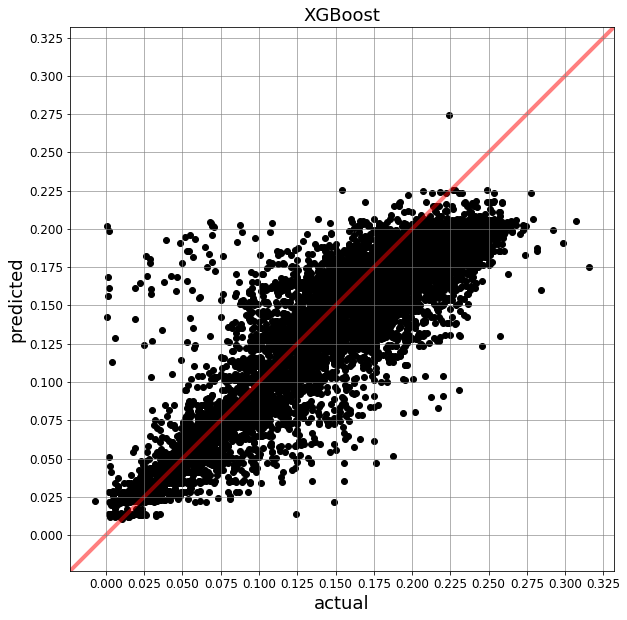

In [ ]:
# plot real and prediction
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot( output['real'], output['predict'],'o', zorder=1, color='black');
ax.set_xlabel('actual', fontsize=18)
ax.set_ylabel('predicted', fontsize=18)
ax.set_title('XGBoost', fontsize=18) # 可改title


#plot y=x line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'r-', alpha=0.5, zorder=1,linewidth=4)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)



plt.xticks(np.arange(0, 0.326, 0.025))
plt.yticks(np.arange(0, 0.326, 0.025))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(which='major', color='gray', linewidth=0.6)


plt.savefig('_PredictvsReal.png', dpi=100,facecolor='white', transparent=False) # 可改檔名

In [ ]:
# calculate error
#MSE
import math
from sklearn.metrics import mean_squared_error
MSE_y=mean_squared_error(output['real'], output['predict'])
print('MSE: ',MSE_y)

#RMSE
RMSE_y=math.sqrt(MSE_y)
print('RMSE: ',RMSE_y)

#nRMSE
nRMSE_y=(RMSE_y/(max(output['real'])-min(output['real'])))
print('nRMSE: ',nRMSE_y)


MSE:  0.0010185354928602716
RMSE:  0.03191450286092941
nRMSE:  0.09886772881328813


In [ ]:
#save error to csv file
errorIndex=pd.DataFrame([MSE_y,RMSE_y,nRMSE_y],columns=['Value'],index=['MSE','RMSE','nRMSE'])
print(errorIndex)
errorIndex.to_csv('_PredictError.csv', float_format='%.4f') # 可改檔名

          Value
MSE    0.001019
RMSE   0.031915
nRMSE  0.098868
